# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd

circles = pd.DataFrame({
    'X0': X[:, 0],
    'X1': X[:, 1],
    'y': y
})

circles

,X0,X1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


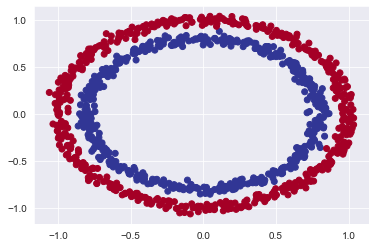

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap=plt.cm.RdYlBu
)
plt.show()

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

the steps in modelling with TensorFlow are typcially:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak the model
6. Evaluate...

In [9]:
import tensorflow as tf

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Metal device set to: Apple M1 Pro
Epoch 1/5


2022-09-01 13:14:11.875245: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-01 13:14:11.875334: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-09-01 13:14:11.922380: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


21/32 [==================>...........] - ETA: 0s - loss: 3.8381 - accuracy: 0.4509

2022-09-01 13:14:12.095838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4830


In [11]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


2022-09-01 13:14:37.222213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.6934829950332642, 0.5]

Since we are working on a binary classification problem and our model is sgetting around ~50% accruacy.. it's performing like its guessing.

So let's step things up a notch and add an extra layer.

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile a model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

2022-09-01 13:14:37.576894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)


32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000


2022-09-01 13:14:49.468688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.6933314204216003, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase the number of hidden units
2. Compile a model - Here we might want to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - Perhaps we might fit our model for more epochs (leave it training for longer)

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model (this time 3 layers)
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),  # add 100 dense neurons
        tf.keras.layers.Dense(10), # add another layer with 10 neurons
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the mode
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

2022-09-01 13:14:49.866257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [15]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.5090


2022-09-01 13:15:04.259546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.6980188488960266, 0.5090000033378601]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features and labels
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between the zones (where each unique class falls)

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model prediction on X
    """
    # Define the axis boundaries of the plot and create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max  = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # Stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multiclass
    if model.output_shape[-1] > 1:
        print('Doing multi-class classification')
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    else:
        print('Doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



101/313 [========>.....................] - ETA: 0s

2022-09-01 13:15:04.492839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 1ms/step
Doing binary classification


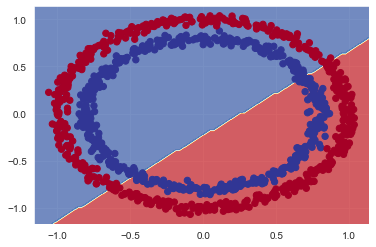

In [18]:
plot_decision_boundary(model_3, X, y)

In [19]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
x_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_2" (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_2" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compiled our model for a binary classification problem.

But.. we're now working on a regression problem, let's change the model to suit our data.

In [20]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model (this time 3 layers)
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, input_shape=[1]),  # add 100 dense neurons
        tf.keras.layers.Dense(10), # add another layer with 10 neurons
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the mode - with a regression loss function
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 11ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 138.8990 - mae: 138.8990
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 53.1034 - mae: 53.1034
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 73.5182 - mae: 73.5182
Epoch 5/100


2022-09-01 13:16:30.100812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 5ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 45.9373 - mae: 45.9373
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 42.3634 - mae: 42.3634
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 43.6836 - mae: 43.6836
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 6ms/step - loss: 42.4794 - mae: 42.4794
Epoch 12/100
5/5 [==============================] - 0s 6ms/step - loss: 41.5533 - mae: 41.5533
Epoch 13/100
5/5 [==============================] - 0s 5ms/step - loss: 42.0975 - mae: 42.0975
Epoch 14/100
5/5 [==============================] - 0s 5ms/step - loss: 41.8650 - mae: 41.8650
Epoch 15/100
5/5 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 9ms/step


2022-09-01 13:16:41.095866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


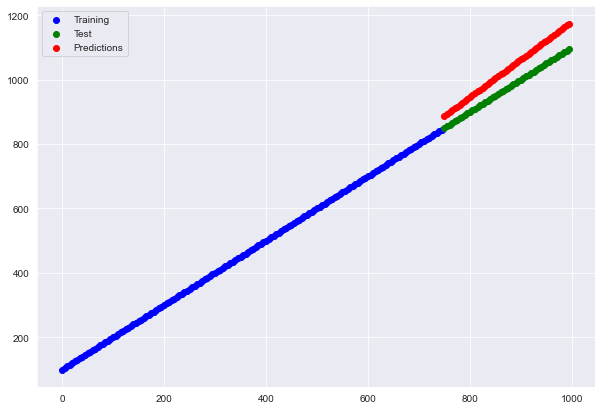

In [21]:
# Make predictions with our trained model
y_reg_pred = model_3.predict(x_reg_test)

# Plot the model's predictions against regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training')
plt.scatter(x_reg_test, y_reg_test, c='g', label='Test')
plt.scatter(x_reg_test, y_reg_pred, c='r', label='Predictions')
plt.legend()

## The missing piece: Non-linearity

In [22]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
    ]
)

# 2. Compile the model
model_4.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
21/32 [==================>...........] - ETA: 0s - loss: 4.3577 - accuracy: 0.4568

2022-09-01 13:16:45.907099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.9582 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 3.8602 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7907 - accuracy: 0.4090
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7608 - accuracy: 0.4130
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7168 - accuracy: 0.4180
Epoch 11/100
32/32 [=

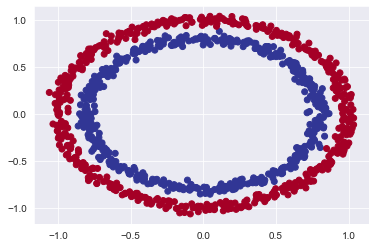

In [23]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

111/313 [=========>....................] - ETA: 0s

2022-09-01 13:17:10.925198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
Doing binary classification


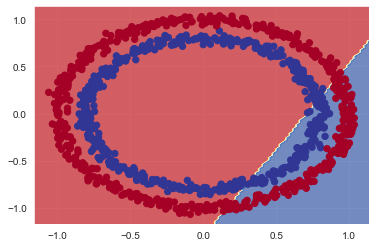

In [24]:
# Check th decision boundary for our latest model
plot_decision_boundary(model_4, X, y)

Let's try to build our first neural network with a non-linear activation function.

In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear actiaviton
model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
    ]
)

# 2. Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100


/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-09-01 13:17:13.123220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 6ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.9582 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 3.8602 - accuracy: 0.4090
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7907 - accuracy: 0.4090
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7608 - accuracy: 0.4130
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 3.7168 - accuracy: 0.4180
Epoch 11/100
32/32 [=

In [26]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu')
    ]
)

# 2. Compile the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
10/32 [========>.....................] - ETA: 0s - loss: 3.5752 - accuracy: 0.0000e+00

2022-09-01 13:17:30.267051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 7ms/step - loss: 3.2090 - accuracy: 0.0010
Epoch 2/250
32/32 [==============================] - 0s 5ms/step - loss: 2.6774 - accuracy: 0.0050
Epoch 3/250
32/32 [==============================] - 0s 6ms/step - loss: 2.5260 - accuracy: 0.0100
Epoch 4/250
32/32 [==============================] - 0s 6ms/step - loss: 2.4545 - accuracy: 0.0220
Epoch 5/250
32/32 [==============================] - 0s 5ms/step - loss: 2.3271 - accuracy: 0.0420
Epoch 6/250
32/32 [==============================] - 0s 5ms/step - loss: 1.9320 - accuracy: 0.0790
Epoch 7/250
32/32 [==============================] - 0s 5ms/step - loss: 1.6532 - accuracy: 0.1220
Epoch 8/250
32/32 [==============================] - 0s 5ms/step - loss: 1.5984 - accuracy: 0.1320
Epoch 9/250
32/32 [==============================] - 0s 5ms/step - loss: 1.5334 - accuracy: 0.1440
Epoch 10/250
32/32 [==============================] - 0s 5ms/step - loss: 1.4115 - accuracy: 0.1490
Epoch 11/250
32/32 [=

In [27]:
# Evaluate the model
model_6.evaluate(X, y)

24/32 [=====================>........] - ETA: 0s - loss: 0.3311 - accuracy: 0.4792

2022-09-01 13:18:14.566659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 5ms/step - loss: 0.3332 - accuracy: 0.4770


[0.33320391178131104, 0.47700002789497375]

 92/313 [=======>......................] - ETA: 0s

2022-09-01 13:18:14.807999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Doing multi-class classification


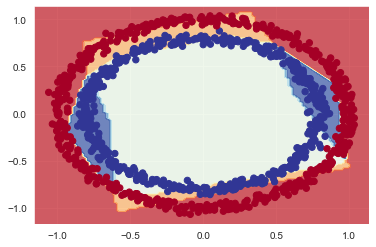

In [28]:
plot_decision_boundary(model_6, X, y)

In [29]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

# 2. Compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
model_7.fit(
    X, y,
    epochs=100
)

Epoch 1/100
 9/32 [=======>......................] - ETA: 0s - loss: 0.6938 - accuracy: 0.4931

2022-09-01 13:18:15.659257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 1s 7ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/100
32/32 [=

In [32]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.2949 - accuracy: 0.9910


[0.29486289620399475, 0.9910000562667847]

313/313 [==============================] - 0s 2ms/step
Doing binary classification


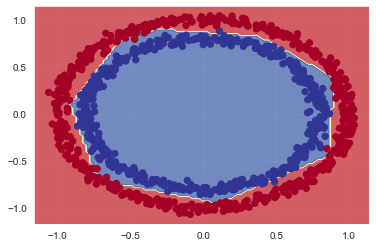

In [33]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**Question:** What is wrong with the predictions we have made? Are we really evaluating our model correctly? Hint: What data did we learn on and what data did we predict on?

**Answer:** The predictions we made are using the same X data we used to train. Ideally, we would have three sets, a training, testing and validation set. We use the training to build the model, and the validation set to test each experiment and when we have made the best model we can, we test against the test set. This means our test set never touches the model until we are ready to test completely.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [34]:
# Create a toy tensor (similar to the data we pass into our models)

A = tf.cast(tf.range(-10, 10), tf.float32)

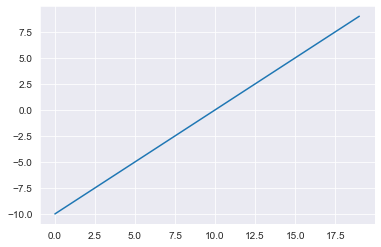

In [35]:
# Visualise our toy tensor
plt.plot(A)

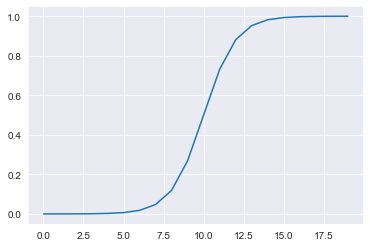

In [36]:
plt.plot(tf.keras.activations.sigmoid(A))

In [37]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu funciton
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

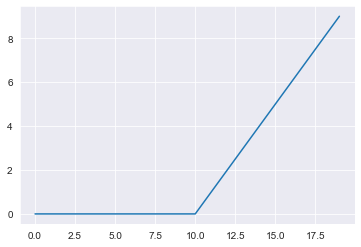

In [38]:
plt.plot(relu(A))

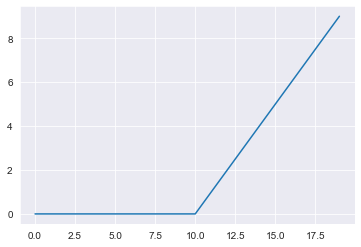

In [39]:
# Alternatively you can just use the tf activation function
plt.plot(tf.keras.activations.relu(A))

## Evaluating and improving our classification model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [40]:
# Check how many examples we have
len(X)

1000

In [41]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [42]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set the random set
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

# 2. Compile the model
model_8.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

# 3. Fit the model
history = model_8.fit(
    X_train, y_train,
    epochs=25
)


Epoch 1/25


/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-09-01 13:18:54.470369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 5ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6264 - accuracy: 0.7012
Epoch 9/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 5ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [===========

In [43]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.1247 - accuracy: 1.0000


2022-09-01 13:18:59.511770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.12468879669904709, 1.0]

 89/313 [=======>......................] - ETA: 0s

2022-09-01 13:19:00.038031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


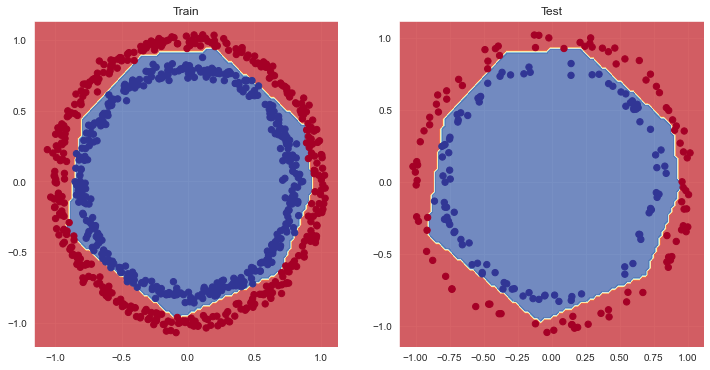

In [44]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X_test, y_test)

plt.show()

## Plot the loss (or training) curves

In [45]:
# Convert the history object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668148,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


<AxesSubplot:>

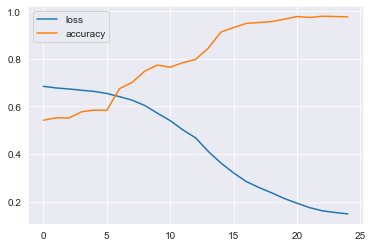

In [46]:
# Plot the loss curves
pd.DataFrame(history.history).plot()

**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate *callback* - you can think of a call back as an extra piece of functionality, you can add to your model while it's training.
* Another model (we could use the same one as above, but we're practicing building models here).
* A modified loss curves plot

In [47]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_9 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

# 2. Compile the model
model_9.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(
    X_train, y_train,
    epochs=100,
    callbacks=[lr_scheduler]
)

Epoch 1/100
22/25 [=========================>....] - ETA: 0s - loss: 0.6958 - accuracy: 0.4957

2022-09-01 13:19:02.378447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.5062 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5012 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5037 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6880 - ac

<AxesSubplot:xlabel='Epochs'>

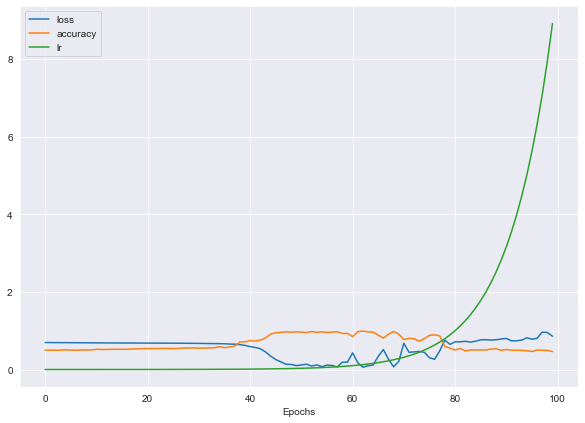

In [48]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel='Epochs')

Text(0.5, 1.0, 'Learning rate vs. Loss')

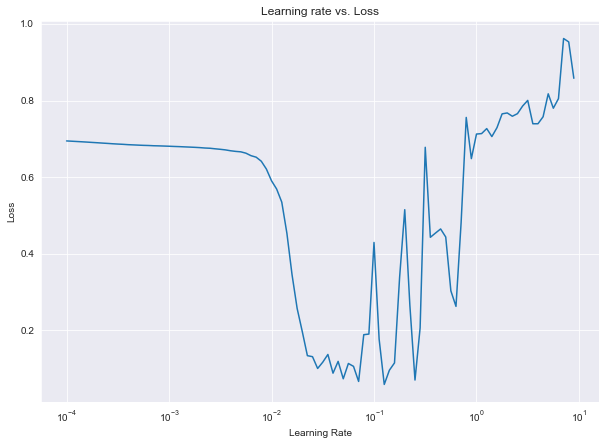

In [49]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10** (tf.range(100)/20))

plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

In [50]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [51]:
# Let's try using a higher *ideal* learning rate with the same model

# Set random Seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

# 2. Compile the model with the ideal learning rate
model_10.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['accuracy']
)

# 3. Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(
    X_train, y_train,
    epochs=20
)

Epoch 1/20
21/25 [========================>.....] - ETA: 0s - loss: 0.6858 - accuracy: 0.5595

2022-09-01 13:19:15.215079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 5ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6743 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6332 - accuracy: 0.6387
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5830 - accuracy: 0.7562
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4907 - accuracy: 0.8312
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

In [52]:
# Evaluate model_10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.0574 - accuracy: 0.9900


2022-09-01 13:19:17.787928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.057402104139328, 0.9899999499320984]

In [53]:
# Evaluate model_8 on the test data
model_8.evaluate(X_test, y_test)

1/7 [===>..........................] - ETA: 0s - loss: 0.1254 - accuracy: 1.0000

2022-09-01 13:19:17.903658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 9ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468879669904709, 1.0]

  1/313 [..............................] - ETA: 9s

2022-09-01 13:19:18.048126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


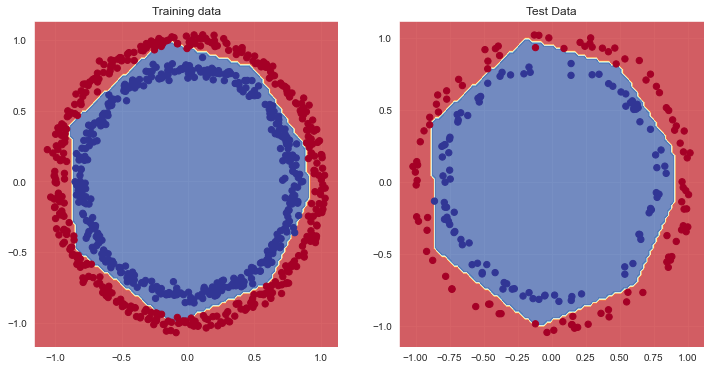

In [54]:
# Plot the decision boundaries  for the training and test sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Training data')
plot_decision_boundary(model_10, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test Data')
plot_decision_boundary(model_10, X_test, y_test)

plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods and metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [55]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 4ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.057402104139328
Model accuracy on the test set: 99.00%


## How about a confusion matrix?

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
# Create a confusion matrix

# Make some predictions
y_pred = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_pred)

7/7 [==============================] - 0s 3ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [58]:
y_test[:10], y_pred[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[9.8526531e-01],
        [9.9923790e-01],
        [9.9032354e-01],
        [9.9706942e-01],
        [3.9623305e-01],
        [1.8127132e-02],
        [9.6829057e-01],
        [1.9747125e-02],
        [9.9967170e-01],
        [5.6460913e-04]], dtype=float32))

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output (or softmax) activation functions.

In [59]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [60]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_pred))

array([[99,  2],
       [ 0, 99]])

## How about we prettify our confusion matrix?

**Note:** The confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix function.

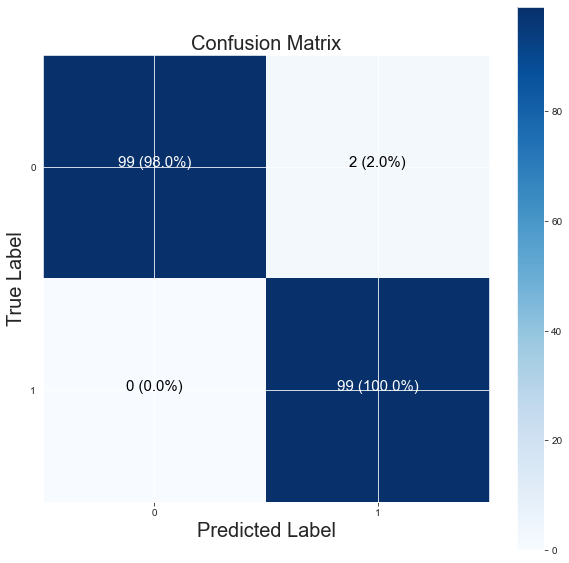

In [61]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalize our confusion matrix

# Get number of classes
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(
    title='Confusion Matrix',
    xlabel='Predicted Label',
    ylabel='True Label',
    xticks=np.arange(n_classes),
    yticks=np.arange(n_classes),
    xticklabels=labels,
    yticklabels=labels
)

# Set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot teh text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j, i, f'{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)',
        horizontalalignment='center',
        color='white' if cm[i,j ] > threshold else 'black',
        size=15
    )

# Working with a larger example (mulitclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have three different classes, it's multi-class classification.
* It also means if you have 100 different classes, its multi-class classification

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

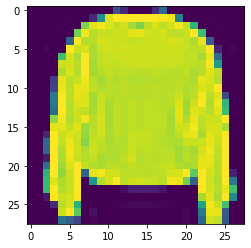

In [5]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [6]:
# Check our samples label
train_labels[7]

2

In [7]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

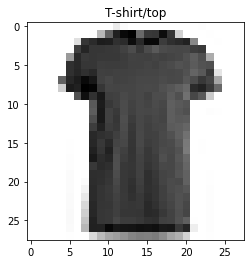

In [8]:
# Plot and example image and it's label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

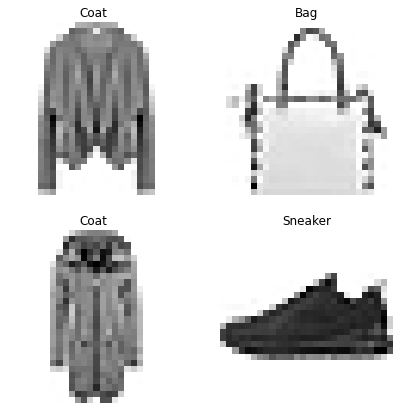

In [9]:
# Plot multiple random images of fashion MNIST
import random

plt.figure(figsize=(7,7))

for i in range(4):
    ax = plt.subplot(2,2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)


## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to your binary classfiiers, however we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss fuction = tf.keras.losses.CategoricalCrossentropy()
    * If your labels are one-hot encoded use CategoricalCrossentropy()
    * If your labels are integerger form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')  # Could also do tf.keras.tf.keras.activations.Softmax
    ]
)

# 2. Compile the model
model_11.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
non_norm_history = model_11.fit(
    train_data,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)

Metal device set to: Apple M1 Pro


2022-09-15 13:38:20.534945: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-15 13:38:20.535280: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2022-09-15 13:38:21.100472: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-15 13:38:21.305572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 2.1770 - accuracy: 0.1626

2022-09-15 13:38:34.687159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 16s 7ms/step - loss: 2.1769 - accuracy: 0.1626 - val_loss: 1.8039 - val_accuracy: 0.2066
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.7187 - accuracy: 0.2407 - val_loss: 1.6656 - val_accuracy: 0.2878
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.6392 - accuracy: 0.2819 - val_loss: 1.6069 - val_accuracy: 0.2839
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.6041 - accuracy: 0.2910 - val_loss: 1.5991 - val_accuracy: 0.2972
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.5955 - accuracy: 0.2979 - val_loss: 1.5903 - val_accuracy: 0.3190
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.5816 - accuracy: 0.3088 - val_loss: 1.5638 - val_accuracy: 0.3024
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.5681 - accuracy: 0.3200 - val_loss: 1.5638 - val_accuracy: 0.3

In [11]:
# Check the model summary
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have numbers in the tensors they try to find patterns in between 0 and 1.

In [13]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [14]:
# Now our data is normalized, let's build a model to find patterns in it
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_12 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ]
)

# 2. Compile the model
model_12.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
norm_history = model_12.fit(
    train_data_norm,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
  19/1875 [..............................] - ETA: 11s - loss: 2.3010 - accuracy: 0.1398

2022-09-15 13:40:30.240272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1867/1875 [============================>.] - ETA: 0s - loss: 1.0363 - accuracy: 0.6470

2022-09-15 13:40:41.094766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 7ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7

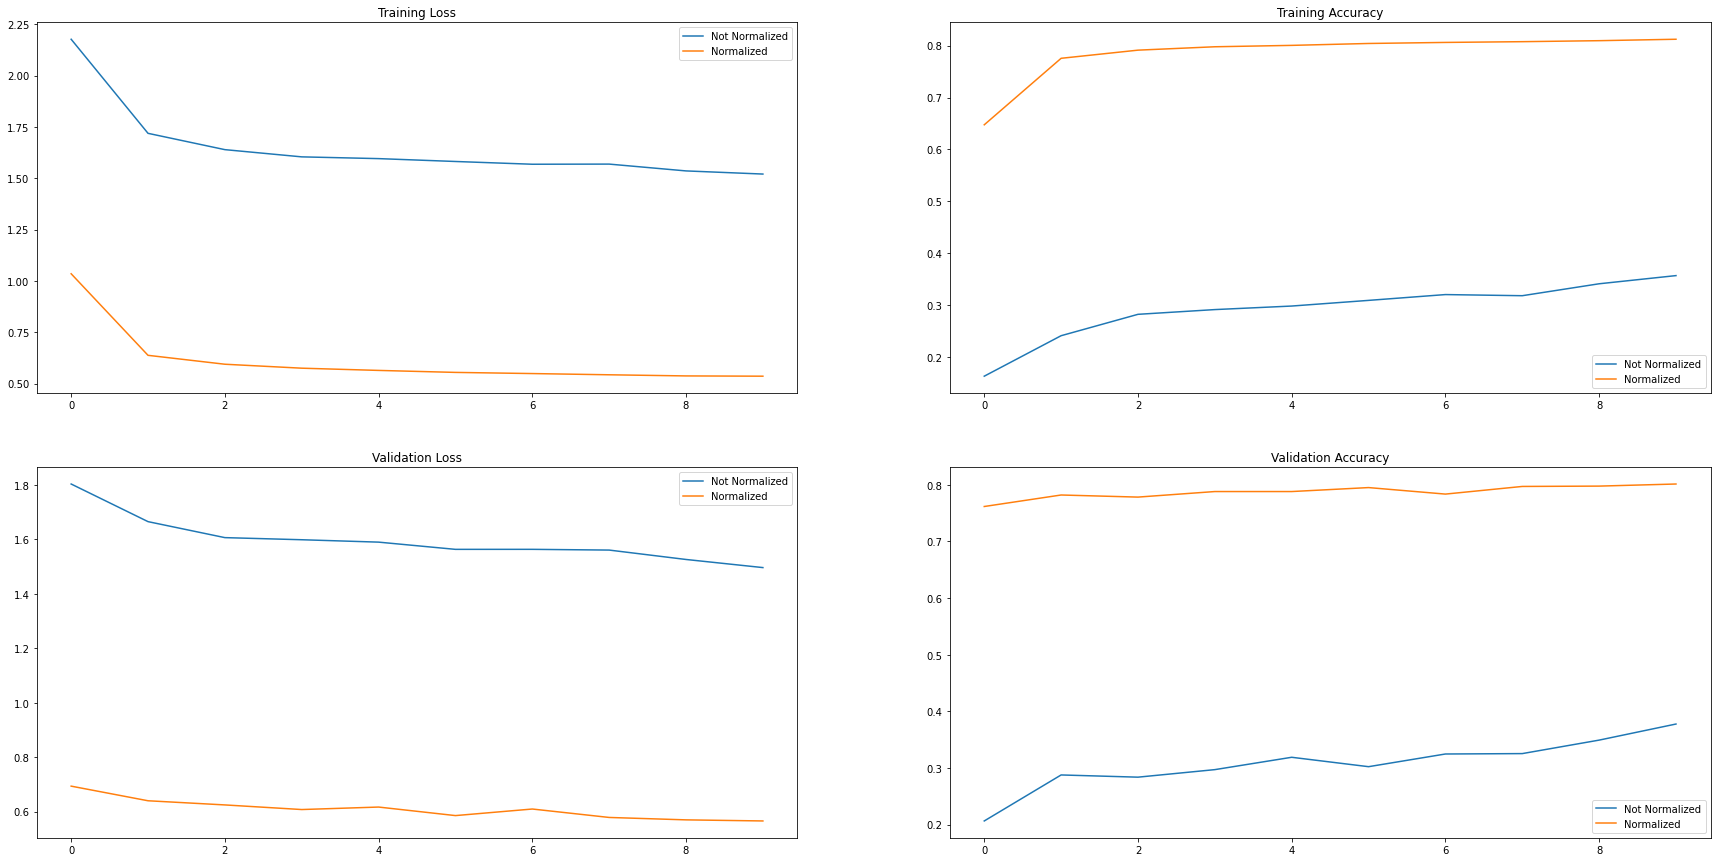

In [15]:
### My Code to do this
# Put histories into dataframes
non_norm_history_df = pd.DataFrame(non_norm_history.history)
norm_history_df = pd.DataFrame(norm_history.history)

plt.figure(figsize=(30,15))
plt.subplot(2, 2, 1)
plt.plot(non_norm_history_df.loss, label='Not Normalized')
plt.plot(norm_history_df.loss, label='Normalized')

plt.title('Training Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(non_norm_history_df.accuracy, label='Not Normalized')
plt.plot(norm_history_df.accuracy, label='Normalized')

plt.title('Training Accuracy')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(non_norm_history_df.val_loss, label='Not Normalized')
plt.plot(norm_history_df.val_loss, label='Normalized')

plt.title('Validation Loss')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(non_norm_history_df.val_accuracy, label='Not Normalized')
plt.plot(norm_history_df.val_accuracy, label='Normalized')

plt.title('Validation Accuracy')
plt.legend()

plt.show()

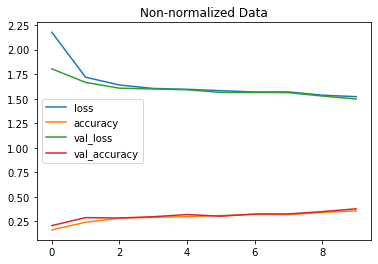

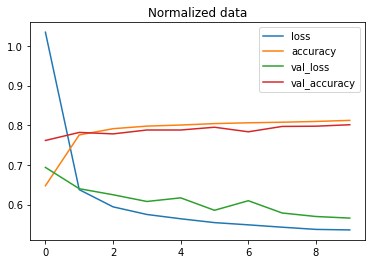

In [16]:
### Courses code to do this
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

plt.show()

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you are comparing models, it's important to make sure you are comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_13 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
    ]
)

# 2. Compile the model
model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 2.5. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
find_lr_history = model_13.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
   1/1875 [..............................] - ETA: 9:11 - loss: 2.4104 - accuracy: 0.0625

2022-09-15 13:42:38.073769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 1.9128 - accuracy: 0.3120

2022-09-15 13:42:46.801727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 1.9126 - accuracy: 0.3121 - val_loss: 1.6130 - val_accuracy: 0.4120 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3422 - accuracy: 0.5300 - val_loss: 1.1290 - val_accuracy: 0.6441 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9738 - accuracy: 0.6798 - val_loss: 0.9039 - val_accuracy: 0.6927 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8289 - accuracy: 0.7134 - val_loss: 0.8146 - val_accuracy: 0.7149 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7603 - accuracy: 0.7366 - val_loss: 0.7615 - val_accuracy: 0.7366 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7181 - accuracy: 0.7506 - val_loss: 0.7296 - val_accuracy: 0.7448 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [=================

Text(0.5, 1.0, 'Finding  the ideal learning rate')

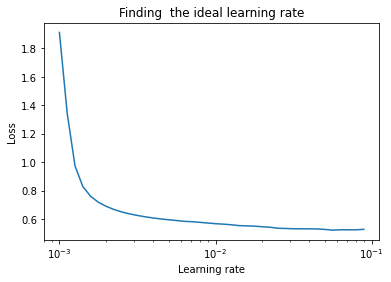

In [18]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding  the ideal learning rate')

In [19]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_14 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

# 2. Compile the model
model_14.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

history_14 = model_14.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/20


/Users/georgeharris/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


  22/1875 [..............................] - ETA: 9s - loss: 2.2988 - accuracy: 0.1392

2022-09-15 13:49:10.372709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1872/1875 [============================>.] - ETA: 0s - loss: 1.0354 - accuracy: 0.6473

2022-09-15 13:49:19.236470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7

## Evaluating our multi-class classification model

To evalutate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top two...


In [20]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalize our confusion matrix

    # Get number of classes
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(
        title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
    )

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot teh text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, f'{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)',
            horizontalalignment='center',
            color='white' if cm[i,j ] > threshold else 'black',
            size=text_size
        )

In [21]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [22]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm)  # Probs is short for prediction probabilities

# View the first 5 predictions
y_probs[:5]

 91/313 [=======>......................] - ETA: 0s

2022-09-15 13:52:26.712618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


array([[8.5631710e-11, 3.5362791e-13, 2.6634090e-05, 4.6356906e-08,
        5.0950002e-05, 9.6119374e-02, 8.1779149e-08, 9.1868721e-02,
        4.0605310e-03, 8.0787367e-01],
       [3.4278780e-06, 1.2899819e-16, 9.5989138e-01, 2.0516326e-07,
        1.5329260e-02, 2.4534769e-13, 2.4142934e-02, 1.1383463e-28,
        6.3272496e-04, 4.4789044e-08],
       [6.1063140e-05, 9.9657679e-01, 4.3867338e-08, 3.3405889e-03,
        1.3249571e-05, 1.4385432e-21, 8.2790984e-06, 7.3243146e-18,
        5.4811487e-08, 4.9228613e-14],
       [7.5032222e-05, 9.9053687e-01, 4.2529317e-07, 9.2232181e-03,
        1.3623324e-04, 1.8278663e-18, 2.6808684e-05, 4.8127138e-14,
        1.4521586e-06, 2.2212883e-11],
       [7.2189860e-02, 1.5495737e-06, 2.5566882e-01, 1.0363129e-02,
        4.3541376e-02, 1.1070164e-13, 6.1693037e-01, 6.7541488e-23,
        1.3049254e-03, 1.2140344e-09]], dtype=float32)

> **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was  trained on normalized data, you'll want to make predictions on normalized data).

In [23]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5631710e-11, 3.5362791e-13, 2.6634090e-05, 4.6356906e-08,
        5.0950002e-05, 9.6119374e-02, 8.1779149e-08, 9.1868721e-02,
        4.0605310e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [24]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [25]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

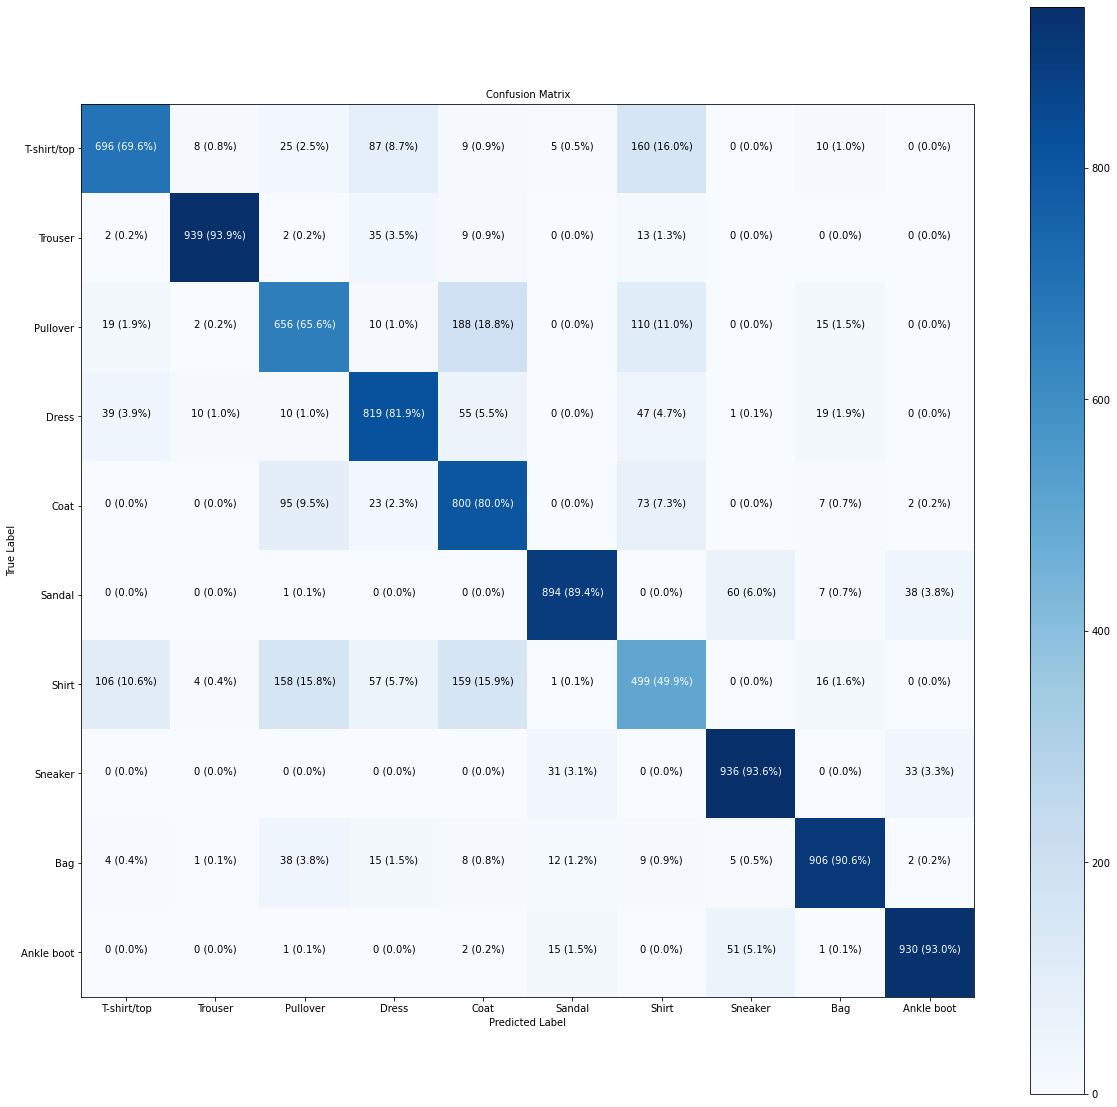

In [26]:
make_confusion_matrix(
    y_true=test_labels,
    y_pred=y_preds,
    classes=class_names,
    figsize=(20,20),
    text_size=10
)

> **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to devlop a further understanding of the data and the input and outputs of your models.

How about we create a fun little functions for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and the predicted label

In [27]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    :param model: Trained tensorflow model
    :param images:
    :param true_labels:
    :param classes:
    """
    # Set up a random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap='binary')

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    # Add xlabel information
    plt.xlabel(
        'Pred: {} {:2.0f}% (True: {})'.format(
            pred_label,
            100*tf.reduce_max(pred_probs),
            true_label),
        color=color  # Set the color to green or red based on if the prediction is correct
    )

    pass

1/1 [==============================] - 0s 339ms/step


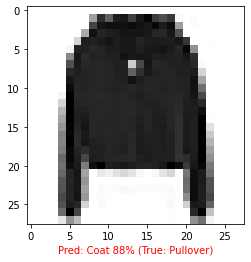

In [28]:
# Check our a random image as well as its prediction
plot_random_image(
    model=model_14,
    images=test_data_norm,
    true_labels=test_labels,
    classes=class_names
)

# What patterns is out model learning?

In [29]:
# Find the layers of our most recent model
model_14.layers

In [30]:
# Extract a particular layer
model_14.layers[1]

In [32]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.71502715, -0.06077139, -0.9976307 , -1.0484309 ],
        [ 0.2773214 , -0.4715549 , -0.52916527,  0.02329225],
        [ 0.77524215,  0.54027444, -1.1288568 , -0.74261445],
        ...,
        [-0.39453486,  0.47628668, -0.2264155 ,  0.25505885],
        [-0.40515733,  0.61810106,  0.23928475, -0.5038752 ],
        [ 0.23884515,  0.11606817, -0.12131335,  0.04352402]],
       dtype=float32),
 (784, 4))

In [34]:
model_14.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector...

In [37]:
# Biases and biases shapes
biases, biases.shape

(array([ 2.4486860e-02, -6.1558490e-04, -2.7230233e-01,  8.1124890e-01],
       dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [38]:
model_14.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
